<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/qr_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
from scipy import linalg

In [38]:
import matplotlib.pyplot as plt
from pprint import pprint
#np.set_printoptions(precision=3, suppress=False)
np.set_printoptions(precision=3, suppress=True)
#np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})

In [39]:
np.random.seed(1)

In [40]:
A = np.random.randn(5,5)

In [41]:
# make A symmetric
A = (A+A.T)/2

In [42]:
A

array([[ 1.624, -1.457,  0.467, -1.086, -0.118],
       [-1.457,  1.745, -1.411,  0.073,  0.448],
       [ 0.467, -1.411, -0.322, -0.631,  1.018],
       [-1.086,  0.073, -0.631,  0.042,  0.543],
       [-0.118,  0.448,  1.018,  0.543,  0.901]])

## Calculate Hessenberg form of A

In [43]:
from scipy.linalg import hessenberg

In [44]:
A = np.random.randn(5,5)
H, Q = hessenberg(A, calc_q=True)
print(H)

[[-0.684 -0.198 -0.505  0.973  0.06 ]
 [ 0.96  -0.313  0.234  0.704  0.271]
 [ 0.     1.08   0.311  2.103  0.426]
 [ 0.     0.     0.965  0.674 -2.302]
 [ 0.     0.     0.     0.11   1.475]]


In [45]:
A = np.random.randn(5,5)
H, Q = hessenberg(A+A.T, calc_q=True)
print(H)

[[ 0.6   -2.562  0.    -0.     0.   ]
 [-2.562  1.383 -2.28   0.     0.   ]
 [ 0.    -2.28   3.5    2.019 -0.   ]
 [ 0.     0.     2.019  2.206 -1.346]
 [ 0.     0.     0.    -1.346  0.617]]


## Run QR algorithm

In [46]:
# QR algorithm
A = H
for i in range(50):
  Q,R = linalg.qr(A)
  A = R.dot(Q)

In [47]:
print(A)

[[ 6.111  0.     0.    -0.    -0.   ]
 [ 0.     3.298 -0.     0.     0.   ]
 [ 0.    -0.    -2.149 -0.    -0.   ]
 [ 0.     0.    -0.     1.444  0.   ]
 [ 0.     0.     0.    -0.    -0.398]]


In [48]:
w, v = np.linalg.eig(H)

In [49]:
print(w)

[ 6.111  3.298 -2.149  1.444 -0.398]


In [50]:
lambda_max = w[np.argmax(np.abs(w))]
print('Largest eigenvalue: ', lambda_max)

Largest eigenvalue:  6.110990562883842


In [51]:
print(v)

[[-0.221 -0.509 -0.627 -0.473  0.276]
 [ 0.475  0.535 -0.672  0.156  0.108]
 [-0.736  0.122 -0.337  0.527 -0.226]
 [-0.416  0.592  0.184 -0.361  0.559]
 [ 0.102 -0.298  0.09   0.587  0.741]]


In [52]:
v@v.T

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Check convergene rate

In [53]:
w,v=np.linalg.eig(A)

In [75]:
np.random.seed(2)
A = np.random.randn(10,10)/np.sqrt(10)
A = A+A.T
H, Q = hessenberg(A, calc_q=True)
print(H)

[[-0.264 -1.453 -0.     0.    -0.    -0.     0.     0.     0.     0.   ]
 [-1.453 -0.527 -1.258 -0.     0.     0.    -0.     0.     0.    -0.   ]
 [ 0.    -1.258 -0.118 -1.675  0.     0.    -0.     0.    -0.     0.   ]
 [ 0.     0.    -1.675 -0.639  0.818  0.    -0.     0.    -0.    -0.   ]
 [ 0.     0.     0.     0.818  1.171  0.836  0.    -0.    -0.     0.   ]
 [ 0.     0.     0.     0.     0.836  1.209 -0.905 -0.     0.    -0.   ]
 [ 0.     0.     0.     0.     0.    -0.905 -0.475  1.356  0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.356 -0.06  -0.46  -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.46  -0.126  1.08 ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     1.08   0.725]]


Pure QR Algorithm 

Linear convergence

In [78]:
# Pure QR algorithm
A = H
loss = []
for i in range(1000):
  Q,R = linalg.qr(A)
  A = R.dot(Q)
  diff = np.linalg.norm(A-np.diag(np.diag(A)),ord='fro')
  loss.append(diff)

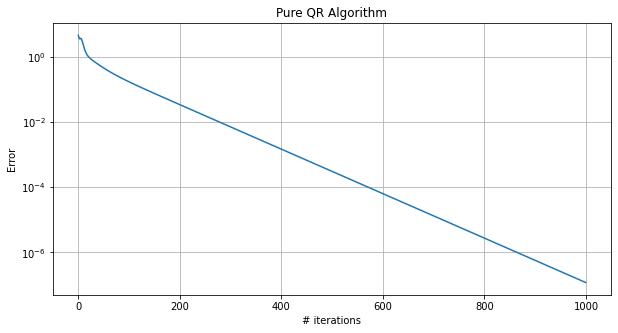

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.array(loss))
ax.set_xlabel('# iterations')
ax.set_ylabel('Error')
ax.set_yscale('log')
ax.set_title('Pure QR Algorithm')
ax.grid()

In [72]:
print('Eigenvalues: ', np.diag(A))

Eigenvalues:  [-2.74   2.435  1.944 -1.877 -1.567  1.543  1.175 -0.867  0.653  0.197]


In [81]:
print(A)

[[-2.74   0.    -0.     0.     0.     0.    -0.    -0.    -0.     0.   ]
 [-0.     2.435  0.    -0.     0.    -0.    -0.    -0.    -0.     0.   ]
 [ 0.     0.     1.944 -0.     0.    -0.     0.     0.    -0.    -0.   ]
 [ 0.     0.    -0.    -1.877 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.    -0.    -1.567 -0.    -0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.     1.543  0.    -0.    -0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.     1.175  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.867 -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.653  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.197]]


## Shift QR Algorithm

In [58]:
def wilkinson_shift(B):
  # B is 2 x 2 matrix
  delta = (B[0,0]-B[1,1])/2
  mu = B[1,1] - np.sign(delta)*B[0,1]*B[0,1]/(np.abs(delta)+np.sqrt(delta*delta+B[0,1]*B[0,1]))
  return mu

In [82]:
# Shifted QR algorithm
A = H
loss = []
eps = 1e-6
eigs = []
for i in range(100):
  mu = A[-1,-1]
  #mu = wilkinson_shift(A[-2:,-2:])
  Q,R = linalg.qr(A-mu*np.identity(A.shape[0]))
  A = R.dot(Q) + mu*np.identity(A.shape[0])

  if np.abs(A[-1,-2])<eps:  # deflate, reduce to n-1 x n-1 matrix
    A = A[:-1,:-1]
    eigs.append(mu)

  if A.shape[0]<=1:
    eigs.append(A[0,0])
    break

  diff = np.linalg.norm(A-np.diag(np.diag(A)),ord='fro')
  loss.append(diff)

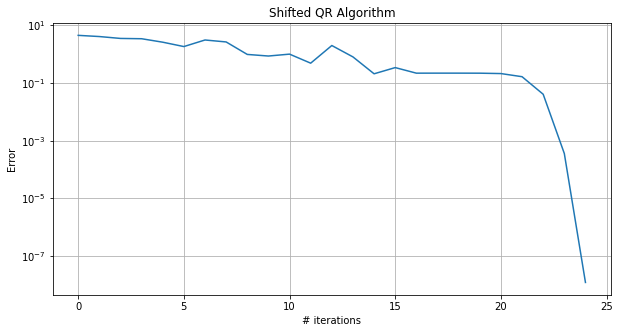

In [83]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.array(loss))
ax.set_xlabel('# iterations')
ax.set_ylabel('Error')
ax.set_yscale('log')
ax.set_title('Shifted QR Algorithm')
ax.grid()

In [84]:
print('Eigenvalues: ', np.array(eigs))

Eigenvalues:  [ 0.653  1.175  1.543  0.197  1.944 -0.867  2.435 -1.567 -1.877 -2.74 ]
